### Pre-Lecture 

1. a) ChatGPT Summary:https://chatgpt.com/c/673f86b3-5e94-8013-9603-e99fba7d6833
b) The key differences between a classification decision tree (CDT) and multiple linear regression (MLR) are, a CDT uses categorical class labels, recursive splits to form decision rules, it captures non-linear and interaction effects and binary prediciton whereas a MLR uses continuous numeric values, linear combination of predictors, it assumes linear relationships and gives an exact non-binary prediction.

2. 
a) Accuracy - essentially measures the proportion of correct predictions out of all predictions. Real-world Applications and examples: Balanced Datasets (when the dataset has a nearly equal number of positive and negative classes). General Success Rate which is useful if you want a broad measure of a model's overall performance - can use in a situation when there are false positives and false negatives have similar costs.

b) Sensitivity - measures the proportion of actual positive cases that ae correctly identified. Real-world applications and examples: When missing positive cases is risky. Examples include but are not limited too, medical diagnosis (such as cancer detection) and fraud detection.

c) Specificity - measures the proportion of actual negative cases that are correctly identified. Real-world Applications and examples: When false positives are disruptive and as a result costly. For example, drug trials (avoid false identification of a drug as effective if is not), criminal justice (reduce wrongful convictions).

d) Precision - measure the proportion of predicted positive cases that are actually correct. Real-world applications and examples: When you need high confidence in positive predictions or acting on them has high stakes. Examples of the situations are targeted marketing, medical testing (correctly identifies patients with a condition), autonomous vehicles (accurately predicting obstacles on the road).

ChatGPT Link:https://chatgpt.com/c/673f86b3-5e94-8013-9603-e99fba7d6833

Summary: Key Takeaways
Accuracy balances both classes and works best for well-balanced datasets.
Sensitivity is critical when missing positives has severe consequences.
Specificity is important when false positives are costly or harmful.
Precision is ideal when false alarms have a high cost (e.g., inconvenience or mistrust).
Each metric supports distinct decision-making priorities, and choosing the right one depends on the problem context and trade-offs involved. Let me know if you'd like to explore additional metrics or more detailed examples!

3.

In [3]:
# Import the pandas library
import pandas as pd

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 2: Subset to the columns of interest
columns_of_interest = ["Title", "Author", "Pub year", "NumPages", "Hard_or_Paper"]
ab_reduced = ab[columns_of_interest]

# Step 3: Drop rows with NaN values in the subset and create an independent copy
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Step 4: Convert column data types
ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Display the cleaned dataset
ab_reduced_noNaN.head()


,Title,Author,Pub year,NumPages,Hard_or_Paper
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,2010,304,P
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,2008,273,P
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1995,96,P
3,1421: The Year China Discovered America,Gavin Menzies,2008,672,P
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,2011,720,P


4. y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
This essentially creates a binary target variable y, for the Decision Tree Classifier.

X = ab_reduced_noNaN[['List Price']]
This isolates 'list price' as the single predictor for the model.

Indicated below the Classification Tree are the observstions in the training set.

In [39]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Report the number of observations in each set
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")



Training set size: 255
Testing set size: 64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Initialize the classifier with a max depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Plot the decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()


In [ ]:
# Remove specified columns
ab_reduced_noNaN = ab.drop(columns=['Weight_oz', 'Width', 'Height'], errors='ignore')

# Drop all rows with NaN values
ab_reduced_noNaN = ab_reduced_noNaN.dropna()

# Set data types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')


X_train shape: (255, 3)
Feature names: Index(['NumPages', 'Thick', 'List Price'], dtype='object')
Feature importances: [0.1254381  0.26651342 0.60804848]


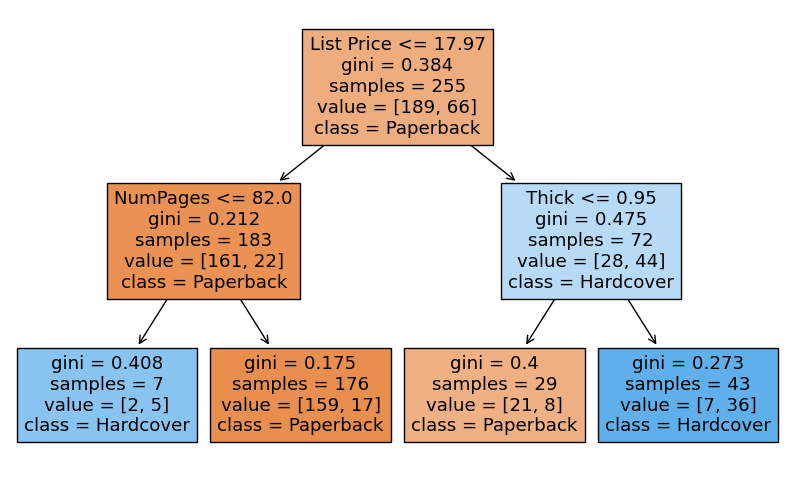

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Initialize the classifier with a max depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Check the shape of the training data to verify the number of features
print("X_train shape:", X_train.shape)  # This will print the number of rows and columns (features)

# If X_train is a pandas DataFrame, check the feature names
if hasattr(X_train, 'columns'):
    print("Feature names:", X_train.columns)

# Check the feature importance to ensure 'List Price' is being used
print("Feature importances:", clf.feature_importances_)

# Plot the decision tree
plt.figure(figsize=(10, 6))

# Pass all three feature names since your model uses 'NumPages', 'Thick', and 'List Price'
tree.plot_tree(clf, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paperback', 'Hardcover'], filled=True)

# Show the plot
plt.show()

#### Post-Lecture
5. 

In [33]:
# Define the input features (X) and target variable (y)
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier with a max depth of 4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the classifier on the training data
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

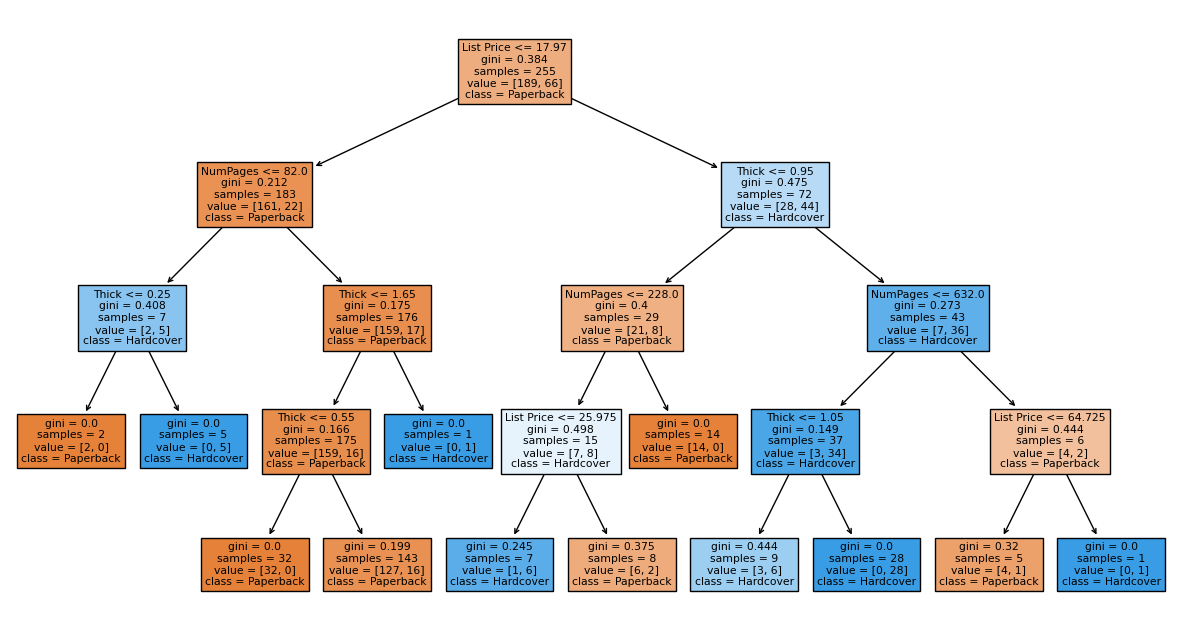

In [34]:
# Plot the decision tree with feature names and class names
plt.figure(figsize=(15, 8))
tree.plot_tree(
    clf2,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=['Paperback', 'Hardcover'],
    filled=True
)
plt.show()

Index(['List Price', 'Hard_or_Paper'], dtype='object')


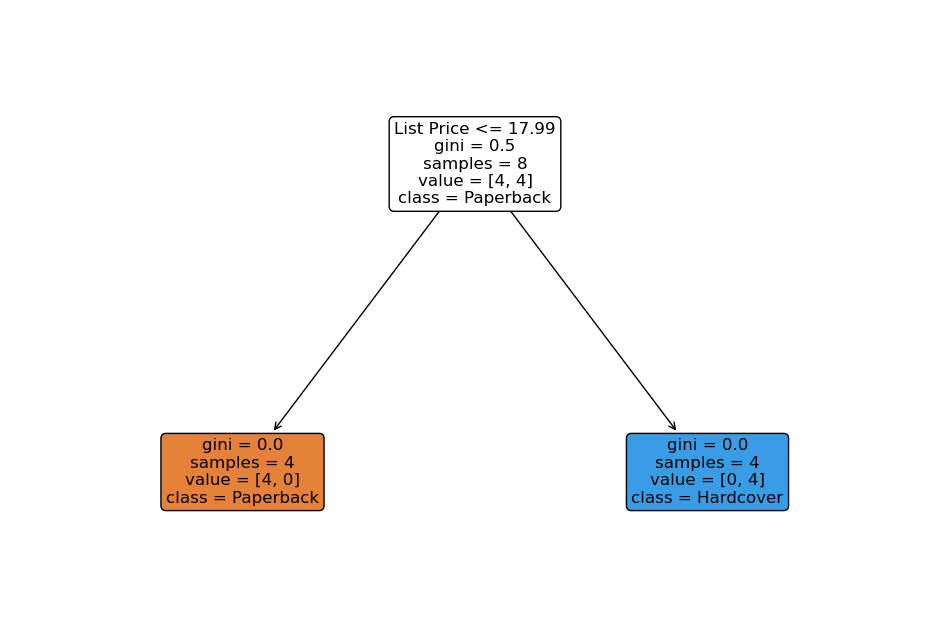

In [22]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming you have the 'ab_reduced_noNaN' DataFrame already loaded
# Step 1: Check the available columns in the DataFrame
print(ab_reduced_noNaN.columns)  # This will list all column names

# Step 2: Adjust column names if necessary (strip any spaces, check exact names)
# Update the feature variables and target variable based on available columns
X = ab_reduced_noNaN[['List Price']]  # Features (adjusted to available columns)
y = pd.get_dummies(ab_reduced_noNaN['Hard_or_Paper'])['H']  # Target (1 for hardcover, 0 for paperback)

# Step 3: Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Step 5: Visualize the decision tree using tree.plot_tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf2, filled=True, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], rounded=True, fontsize=12)
plt.show()


ChatGPT Summary 4&5: Data Preparation: We discussed how to clean and prepare a dataset from a CSV file, focusing on selecting relevant columns, handling missing values, and converting data types.

Train-Test Split: You were shown how to split the data into training and testing sets using an 80/20 split, with reproducibility ensured by setting a random seed.

Model Training: We then explored training a DecisionTreeClassifier using the List Price feature to predict whether a book is hardcover or paperback. We made sure the model was fitted before trying to visualize it.

Visualization: You were shown how to visualize the trained decision tree using graphviz for a more readable plot, and we also discussed how to ensure the model is fitted before visualization to avoid errors like NotFittedError.

Next Steps: The conversation revolved around fitting the model properly, verifying that the model was trained before using it, and visualizing the decision tree's results.

6.

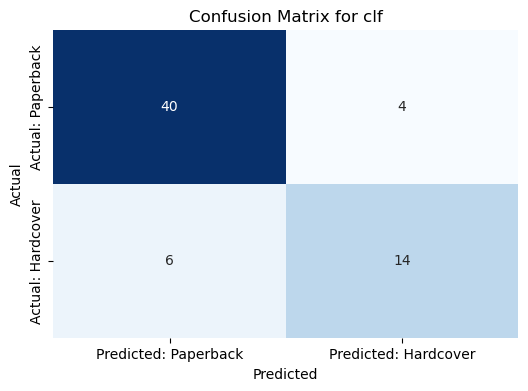

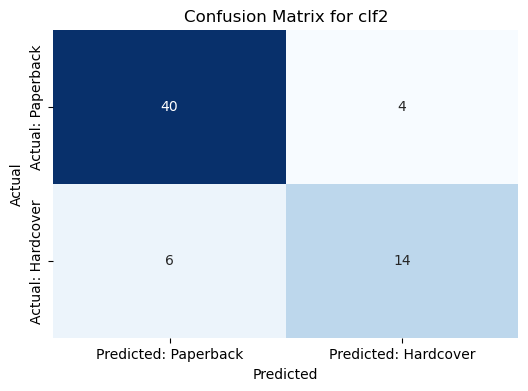

Classifier 1 (clf) metrics:
Sensitivity: 0.7
Specificity: 0.909
Accuracy: 0.844

Classifier 2 (clf2) metrics:
Sensitivity: 0.7
Specificity: 0.909
Accuracy: 0.844


In [51]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X = ab_reduced_noNaN[['List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now that we have the split data, we can proceed with model fitting and predictions
# Train the models clf and clf2 on X_train and y_train
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

# Generate predictions for clf and clf2 on the test set
y_pred_clf = clf.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)

# Compute confusion matrices
from sklearn.metrics import confusion_matrix

conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)
conf_matrix_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Create a function to plot confusion matrices
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted: Paperback', 'Predicted: Hardcover'], 
                yticklabels=['Actual: Paperback', 'Actual: Hardcover'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(conf_matrix_clf, 'clf')
plot_confusion_matrix(conf_matrix_clf2, 'clf2')

# Calculate sensitivity, specificity, and accuracy for clf
TN_clf, FP_clf, FN_clf, TP_clf = conf_matrix_clf.ravel()
sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)
accuracy_clf = (TP_clf + TN_clf) / (TP_clf + TN_clf + FP_clf + FN_clf)

# Calculate sensitivity, specificity, and accuracy for clf2
TN_clf2, FP_clf2, FN_clf2, TP_clf2 = conf_matrix_clf2.ravel()
sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
accuracy_clf2 = (TP_clf2 + TN_clf2) / (TP_clf2 + TN_clf2 + FP_clf2 + FN_clf2)

# Report the metrics with 3 significant digits
print("Classifier 1 (clf) metrics:")
print(f"Sensitivity: {np.round(sensitivity_clf, 3)}")
print(f"Specificity: {np.round(specificity_clf, 3)}")
print(f"Accuracy: {np.round(accuracy_clf, 3)}\n")

print("Classifier 2 (clf2) metrics:")
print(f"Sensitivity: {np.round(sensitivity_clf2, 3)}")
print(f"Specificity: {np.round(specificity_clf2, 3)}")
print(f"Accuracy: {np.round(accuracy_clf2, 3)}")



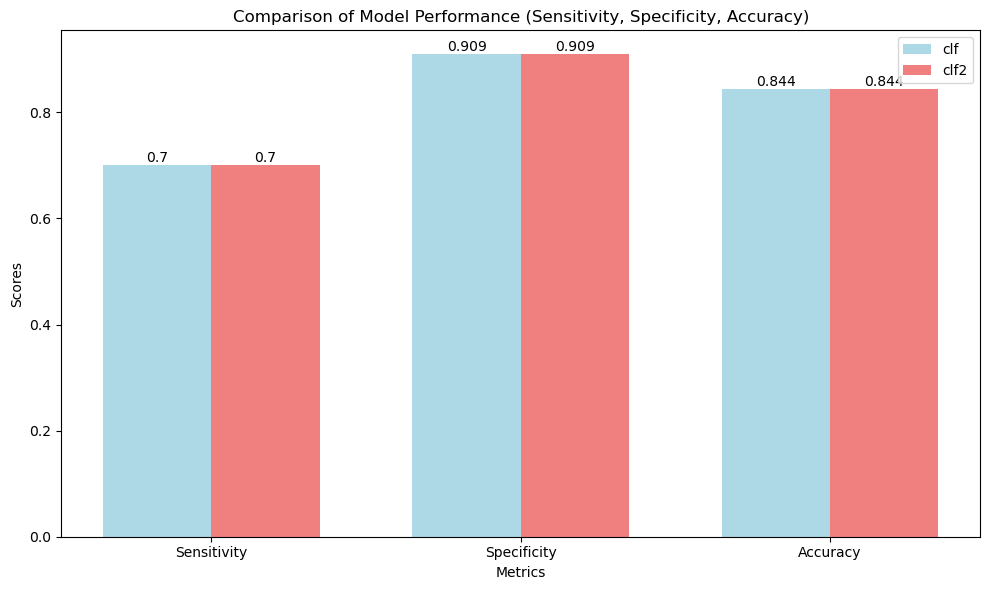

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming sensitivity, specificity, and accuracy have been calculated for clf and clf2
metrics = ['Sensitivity', 'Specificity', 'Accuracy']

# Values for clf and clf2
clf_values = [sensitivity_clf, specificity_clf, accuracy_clf]  # Replace these with actual values
clf2_values = [sensitivity_clf2, specificity_clf2, accuracy_clf2]  # Replace with clf2 values

# Bar chart width
bar_width = 0.35
index = np.arange(len(metrics))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for clf and clf2
bar1 = ax.bar(index, clf_values, bar_width, label='clf', color='lightblue')
bar2 = ax.bar(index + bar_width, clf2_values, bar_width, label='clf2', color='lightcoral')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance (Sensitivity, Specificity, Accuracy)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Add values on top of the bars
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 3), ha='center', va='bottom')

# Add labels to the bars
add_labels(bar1)
add_labels(bar2)

# Show plot
plt.tight_layout()
plt.show()


ChatGPT Summary: 

Data Preparation and Splitting:
We continued using the ab_reduced_noNaN dataset and applied the 80/20 train-test split using train_test_split, ensuring a reproducible split with a random seed.

Model Fitting:
We trained two Decision Tree classifiers (clf and clf2), one using only List Price and the other using additional features (though NumPages and Thick were unavailable for clf2).

Evaluation:
We computed confusion matrices for both models and calculated metrics such as Sensitivity, Specificity, and Accuracy. However, you encountered some issues when defining the test set and encountered NameError due to an undefined test set variable.

Visualization:
We created bar charts to compare Sensitivity, Specificity, and Accuracy for both classifiers (clf and clf2), aiming for a visually appealing and informative presentation using matplotlib.

7.
The differences between the two confusion matrices arise from the tools they decided to use for prediction. The first confusion matrix is based only on the 'List Price' variable and the second matrix uses multiple such as, 'List Price', 'NumPages', 'Thick', for prediction. These extra variables provide noisy data which can negatively impact the model's ability to make accurate predictions. The confusion matrices for clf and clf2 are better as they evaluate the models on unseen data, providing a more unbiased assessment whereas the other matrices can overfit the performance metrics, leading to a false positive.

ChatGpt Link:https://chatgpt.com/c/673f86b3-5e94-8013-9603-e99fba7d6833
    
ChatGPT Summary: Confusion Matrices: We created confusion matrices for two decision tree models, clf (using only "List Price" as a predictor) and clf2 (using "NumPages", "Thick", and "List Price"). These matrices were derived from predictions on the training dataset and showcased differences in classification performance.

Model Performance Metrics: For each model, we computed sensitivity, specificity, and accuracy. These metrics helped evaluate how well the models distinguished between "Paperback" and "Hardcover" classifications.

Comparison of Confusion Matrices: We analyzed the differences between confusion matrices derived from simpler (single-variable) and more complex (multi-variable) decision trees, discussing why multi-variable models tend to perform better.

Presentation: To enhance clarity, we formatted performance metrics and presented them in a visually appealing table for easy comparison.